# ML Data Cleaning and Feature Selection 

**Python · New York City Airbnb Open Data**

Ping Chen 



# Import libraries

In [9]:
!pip install gender_guesser
!pip install wordcloud

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import gender_guesser.detector as gender
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [11]:
# Show plots in jupyter lab
%matplotlib inline 


# Load data

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [13]:
df_org = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df = df_org.copy()

In [14]:
df.shape

(48895, 16)

> Rows: 48895<br>
Columns: 16

In [15]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365



## Not usefull columns

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

> All columns are usefull

# Q: What are the data types? (Only numeric and categorical)

A. see the result below. 

We can simply classify all the float and int types to Numeric. And classify object to Categorical 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [18]:
# Change types
df['id'] = df['id'].astype('int32')
df['name'] = df['name'].str.lower().str.strip()
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').str.lower().str.strip()
df['neighbourhood'] = df['neighbourhood'].astype('category').str.lower().str.strip()
df['room_type'] = df['room_type'].astype('category').str.lower().str.strip()
df['price'] = df['price'].astype('int32')
df['minimum_nights'] = df['minimum_nights'].astype('int32')
df['number_of_reviews'] = df['number_of_reviews'].astype('int32')
df['last_review'] = pd.to_datetime(df['last_review'])
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype('int32')
df['availability_365'] = df['availability_365'].astype('int32')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int32         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int32         
 10  minimum_nights                  48895 non-null  int32         
 11  nu

> memory usage is decreased from 6 to 4.8


## Duplicate

In [20]:
df.duplicated().sum()

0

# Q. Are there missing value?

A. see the result below

<AxesSubplot:>

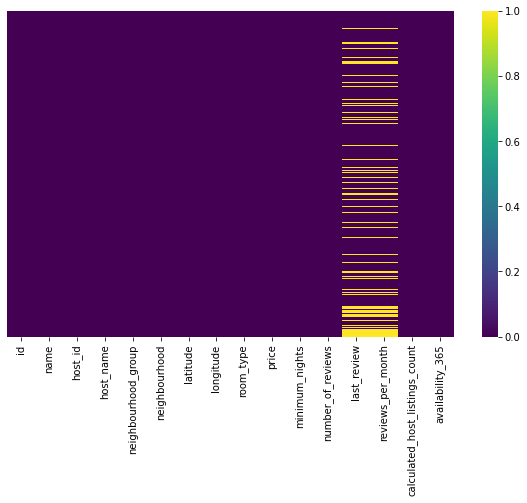

In [21]:
# Show null items in heatmap
plt.figure(num="Heatmap", figsize=(10, 6), facecolor='white')
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=True)

# Q : Which independent variables have missing data? How much? 

In [22]:
# Define null items by columns
df.isnull().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

> Missing Data

* name: 0.03%
* host_name: 0.04
* last_review: 20.5%
* reviews_per_month: 20.5%

*as they are under 50%(even under 21%), the best desion is to do not drop them and fill them.*

In [23]:
df['last_review'].mode()

0   2019-06-23
dtype: datetime64[ns]

In [24]:
mask1 = (df.last_review.isnull())
df[mask1].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,the village of harlem....new york !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaT,NaN,1,365
19,7750,huge 2 br upper east cental park,17985,Sing,manhattan,east harlem,40.79685,-73.94872,entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,magnifique suite au n de manhattan - vue cloitres,26394,Claude & Sophie,manhattan,inwood,40.86754,-73.92639,private room,80,4,0,NaT,NaN,1,0
36,11452,clean and quiet in brooklyn,7355,Vt,brooklyn,bedford-stuyvesant,40.68876,-73.94312,private room,35,60,0,NaT,NaN,1,365
38,11943,country space in the city,45445,Harriet,brooklyn,flatbush,40.63702,-73.96327,private room,150,1,0,NaT,NaN,1,365


> last_reviews = NaN & number_of_reviews = 0, reviews_per_month = NaN<br>
==> last_reviews is not important<br>
==> reviews_per_month = number_of_reviews = 0<br>
[link](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb)

In [25]:
df.drop(columns=['last_review'], axis=1, inplace=True)

In [26]:
df['name'].fillna('None', inplace=True)
df['host_name'].fillna('None', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [27]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


> Maybe *pice*, *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count* have some outliers.<br>
availability_365 == 0<br>
price == 0<br>
are not logic<br>


## Outliers

In [28]:
df.shape

(48895, 15)

In [29]:
df = df[df.availability_365 > 0]
df = df[df.price > 0]

In [30]:
print(df.shape)
df.describe()

(31354, 15)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.135400e+04,3.135400e+04,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,2.100493e+07,8.145071e+07,40.728406,-73.948753,162.091822,8.338426,31.849365,1.509464,10.335460,175.834439
std,1.148777e+07,8.673941e+07,0.056562,0.051400,254.444750,23.838961,51.638559,1.781202,40.705488,126.195374
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.167354e+07,8.619004e+06,40.688392,-73.983280,70.000000,2.000000,2.000000,0.170000,1.000000,55.000000
50%,2.255750e+07,4.108975e+07,40.723725,-73.954115,112.000000,3.000000,10.000000,0.920000,1.000000,168.000000
75%,3.119452e+07,1.452368e+08,40.763037,-73.930152,189.000000,5.000000,39.000000,2.340000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
# Return unbiased kurtosis over requested axis using Fisher's definition of kurtosis (kurtosis of normal == 0.0).
# The result is normalized by N-1
kurt = df.kurt(numeric_only=True)[:]
kurt

id                                 -1.161038
host_id                            -0.693108
latitude                            0.121893
longitude                           3.824772
price                             466.349441
minimum_nights                    709.146469
number_of_reviews                  13.346099
reviews_per_month                  40.295600
calculated_host_listings_count     42.217480
availability_365                   -1.473669
dtype: float64

In [32]:
outlier_cols = [
    'price', 'minimum_nights', 
    'calculated_host_listings_count', 'reviews_per_month',
]

> Data is ok but if we have to do delete them
As you can see **manhattan** is the most expensive neighbourhood_group

In [38]:
df[mask]['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866     92
Name: host_id, dtype: int64

In [40]:
mask = df.reviews_per_month > 20
df[mask]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38870,30423106,lou's palace-so much for so little,228415932,Louann,queens,rosedale,40.65417,-73.74158,private room,45,1,37,20.94,1,134
42075,32678719,enjoy great views of the city in our deluxe room!,244361589,Row NYC,manhattan,theater district,40.75918,-73.98801,private room,100,1,156,58.50,9,299
42076,32678720,great room in the heart of times square!,244361589,Row NYC,manhattan,theater district,40.75828,-73.98876,private room,199,1,82,27.95,9,299


> It's ok 

In [41]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365
1,2595,skylit midtown castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355
2,3647,the village of harlem....new york !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,0.00,1,365


# Q : What are the likely distributions of the numeric variables?

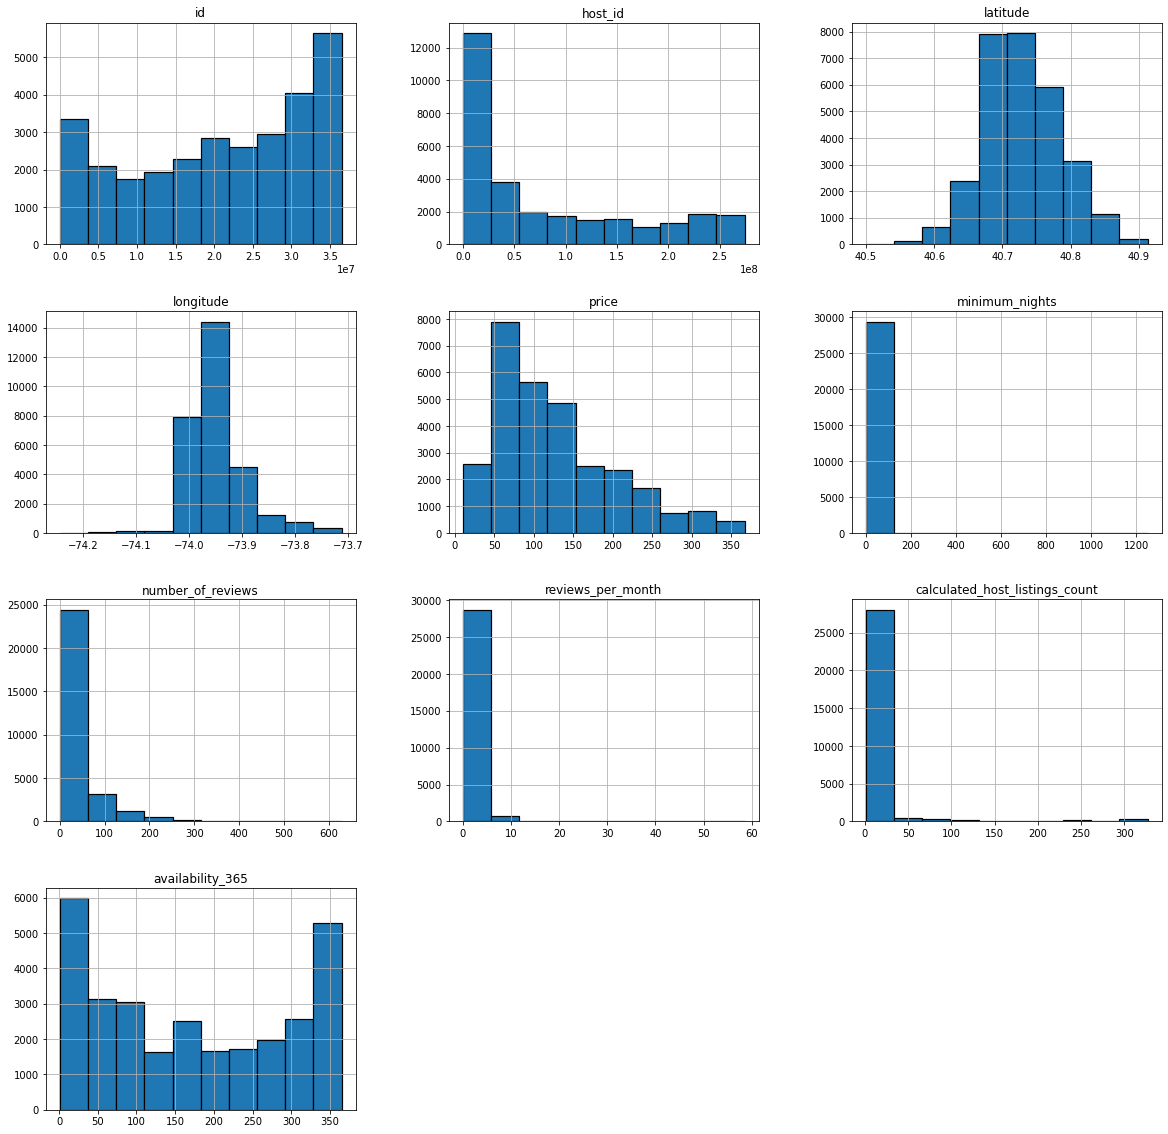

In [50]:
# Distribution for every numeric variables
df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
plt.show()

# Q : Which independent variables are useful to predict a target

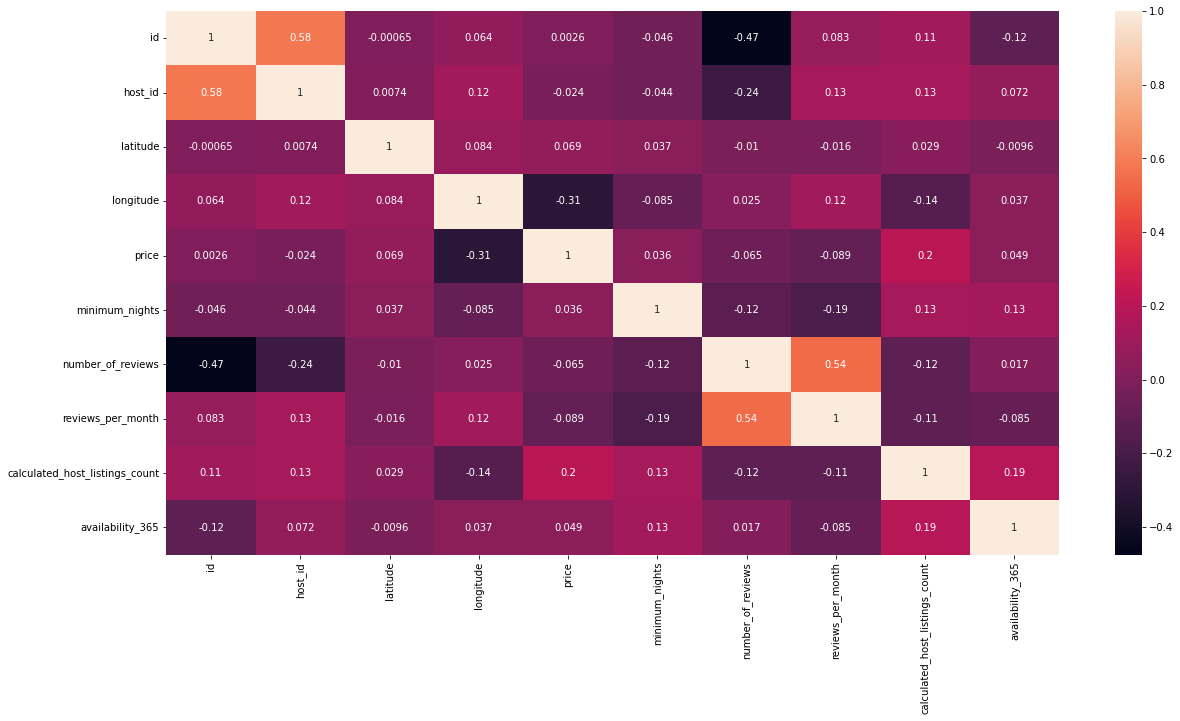

In [51]:
# correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<a id='Transfer_price_to_ln_price_and_log10_price_and_standard_price_log10_to_make_the_dist_Normal'></a>


In [60]:
df['price_ln'] = np.log(df['price'])
df['price_log10'] = np.log10(df['price'])
df['standard_price_log10'] = ((df['price_log10'])-(df['price_log10'].mean())) / (df["price_log10"].std())
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_ln,price_log10,standard_price_log10
0,2539,clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365,5.003946,2.173186,0.562391
1,2595,skylit midtown castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355,5.416100,2.352183,1.249953
2,3647,the village of harlem....new york !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,0.00,1,365,5.010635,2.176091,0.573550


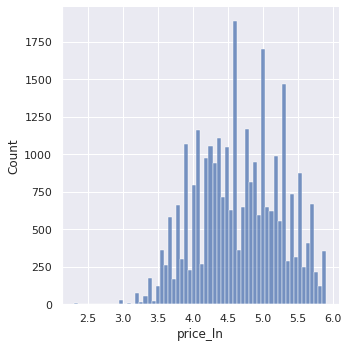

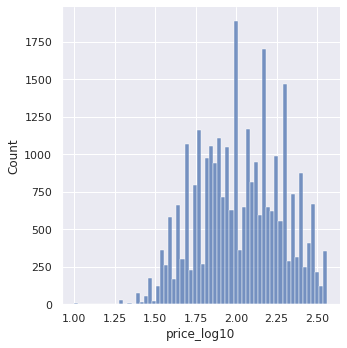

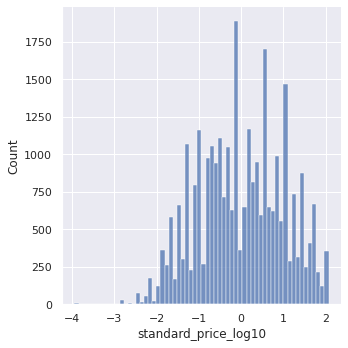

In [61]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.displot(df.price_ln, kde_kws={"label": 'price_ln'})
sns.displot(df.price_log10, kde_kws={"label": 'price_log10'})
sns.displot(df.standard_price_log10, kde_kws={"label": 'standard_price_log10'})
plt.show()

In [62]:
stats.describe(df.price)

DescribeResult(nobs=29493, minmax=(10, 367), mean=126.46400840877496, variance=5588.466941710495, skewness=0.9909278590783019, kurtosis=0.357877761552277)

In [63]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_ln,price_log10,standard_price_log10
count,2.949300e+04,2.949300e+04,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,29493.000000,2.949300e+04
mean,2.088493e+07,8.005973e+07,40.727963,-73.947168,126.464008,8.277727,32.890042,1.541626,9.794290,173.133862,4.666825,2.026776,9.495738e-14
std,1.148224e+07,8.596567e+07,0.057413,0.051820,74.756050,23.252703,52.505361,1.798422,38.879252,125.947720,0.599443,0.260335,1.000000e+00
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.302585,1.000000,-3.944063e+00
25%,1.152145e+07,8.452639e+06,40.687670,-73.982040,69.000000,2.000000,2.000000,0.190000,1.000000,53.000000,4.234107,1.838849,-7.218680e-01
50%,2.238907e+07,4.012086e+07,40.722140,-73.952690,102.000000,3.000000,11.000000,0.960000,1.000000,162.000000,4.624973,2.008600,-6.981848e-02
75%,3.107757e+07,1.400573e+08,40.763350,-73.928400,170.000000,5.000000,41.000000,2.380000,3.000000,302.000000,5.135798,2.230449,7.823491e-01
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,367.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,5.905362,2.564666,2.066147e+00


In [64]:
def smv(name):
    std, mean, var = round(df[name].std(), ndigits=3), round(df[name].mean(), ndigits=3), round(df[name].var(), ndigits=3)
    statistic, pvalue = stats.normaltest(df[name])
    message = f"{name} => Standard deviation: {std} | Mean: {mean} | Variance: {var} | Statistic: {round(statistic, ndigits=3)} | Pvalue: {pvalue}"
    return message

In [65]:
list_name = ["price_ln", "price_log10", "standard_price_log10"]
for name in list_name:
    print(smv(name))

price_ln => Standard deviation: 0.599 | Mean: 4.667 | Variance: 0.359 | Statistic: 1277.386 | Pvalue: 4.161261273404751e-278
price_log10 => Standard deviation: 0.26 | Mean: 2.027 | Variance: 0.068 | Statistic: 1277.386 | Pvalue: 4.161261273395748e-278
standard_price_log10 => Standard deviation: 1.0 | Mean: 0.0 | Variance: 1.0 | Statistic: 1277.386 | Pvalue: 4.1612612733943265e-278



## Price & neighbourhood_group, room_type, reviews_per_month, number_of_reviews

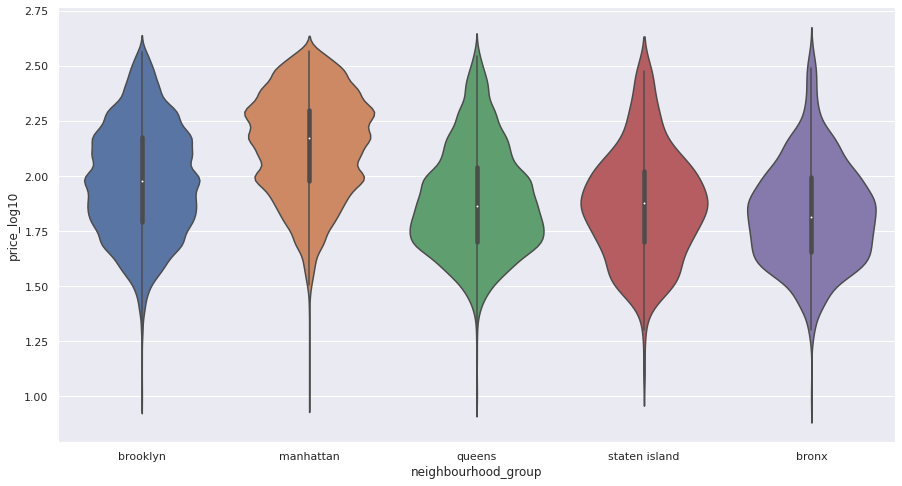

In [66]:
plt.figure(figsize=(15,8))
sns.violinplot(x="neighbourhood_group", y="price_log10", data=df)
plt.show()

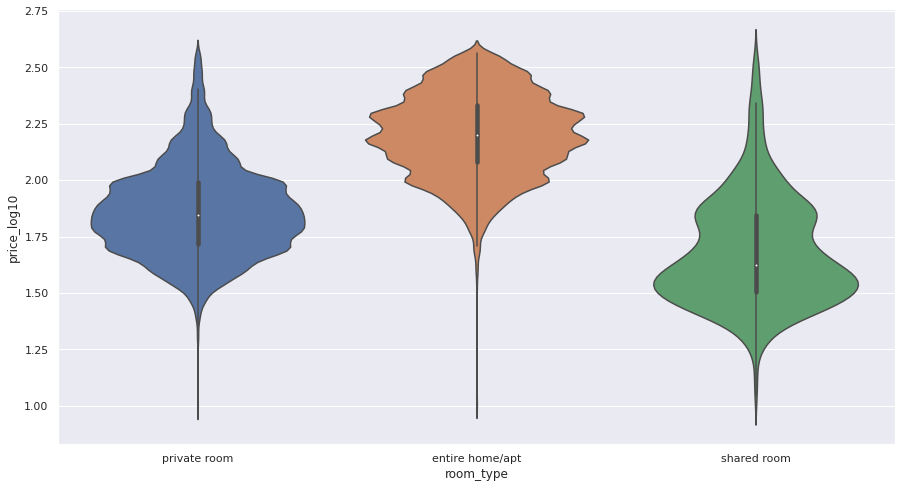

In [67]:
plt.figure(figsize=(15,8))
sns.violinplot(x="room_type", y="price_log10", data=df)
plt.show()

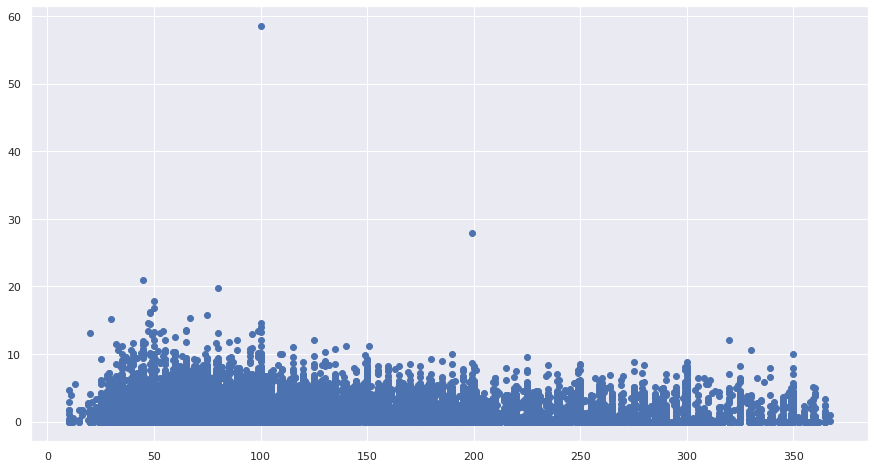

In [68]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.price, y=df.reviews_per_month, )
plt.show()

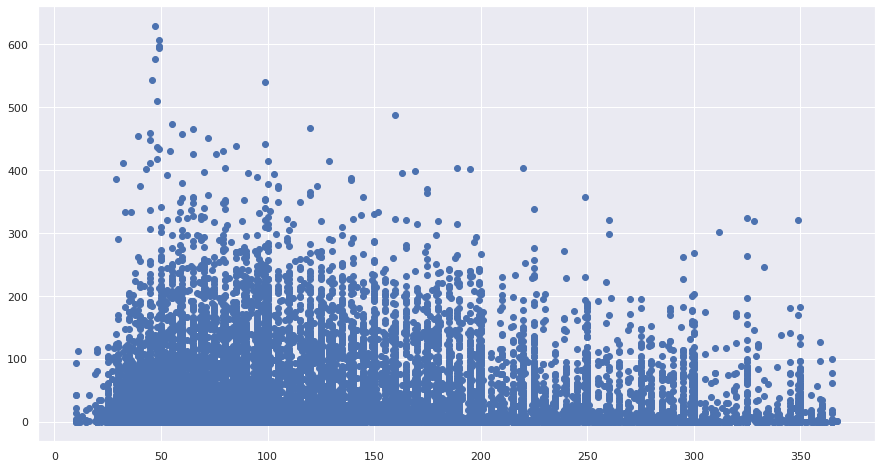

In [69]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.price, y=df.number_of_reviews, )
plt.show()


# Regression

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29493 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29493 non-null  int32  
 1   name                            29493 non-null  object 
 2   host_id                         29493 non-null  int64  
 3   host_name                       29493 non-null  object 
 4   neighbourhood_group             29493 non-null  object 
 5   neighbourhood                   29493 non-null  object 
 6   latitude                        29493 non-null  float64
 7   longitude                       29493 non-null  float64
 8   room_type                       29493 non-null  object 
 9   price                           29493 non-null  int32  
 10  minimum_nights                  29493 non-null  int32  
 11  number_of_reviews               29493 non-null  int32  
 12  reviews_per_month               

In [89]:
categorical_cols = [
    "neighbourhood_group", "neighbourhood", "room_type"
]

In [90]:
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [91]:
y = df["price_log10"]
X = df.copy()
columns=['price', "price_ln", "price_log10", "standard_price_log10", "id", "name", "host_id", "host_name",
         'gender', "reviews_per_month" ,"number_of_reviews"
        ]
X.drop(columns=columns, axis=1, inplace=True)

In [92]:
X.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [95]:
X2_train = pd.DataFrame(data=X_train, columns=X.columns)

In [96]:
fit_X = scaler.fit(X_train)
y_train = pd.DataFrame(data=y_train, columns=['price_log10'])
y_test = pd.DataFrame(data=y_test, columns=['price_log10'])
fit_y = y_scaler.fit(y_train)

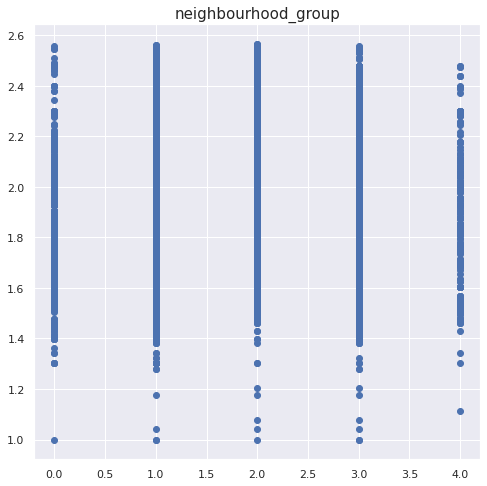

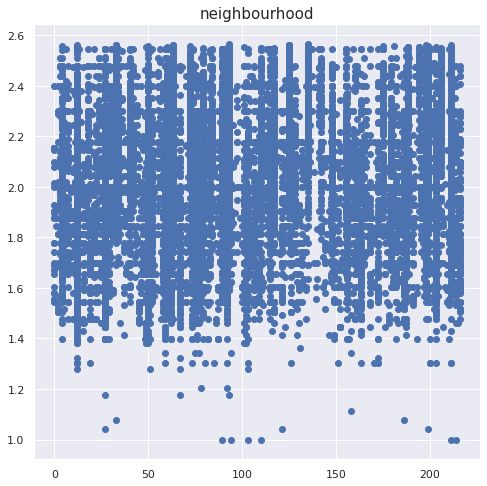

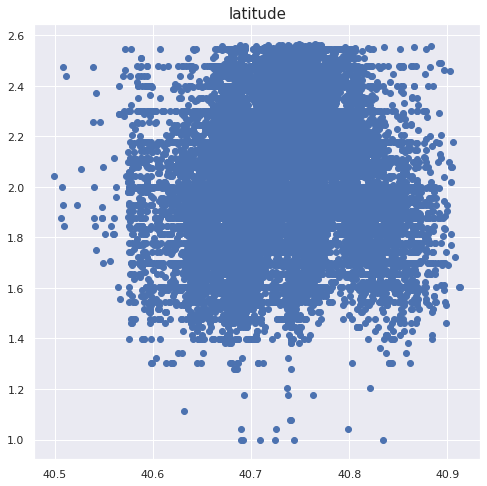

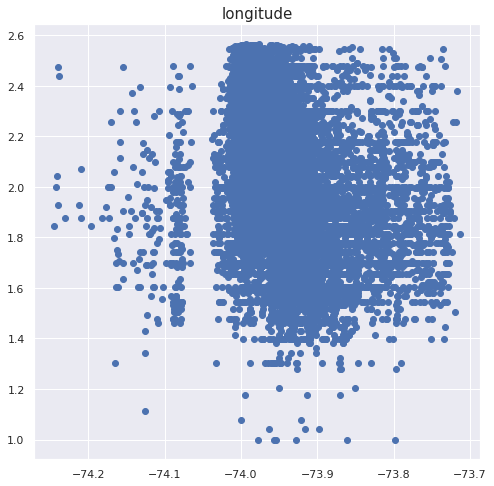

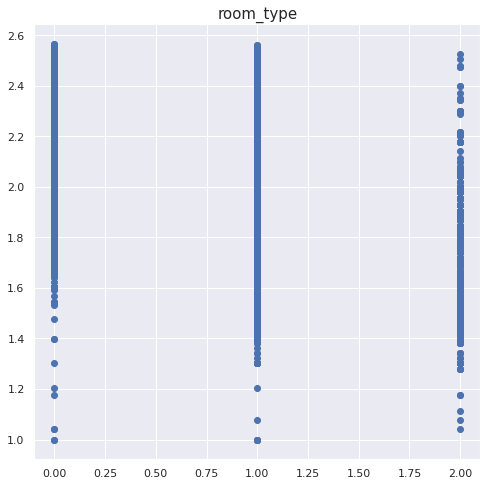

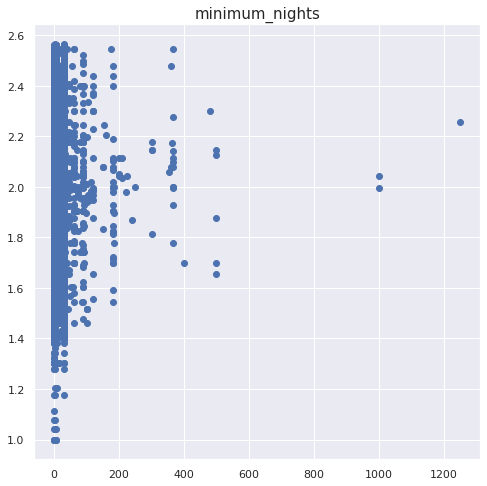

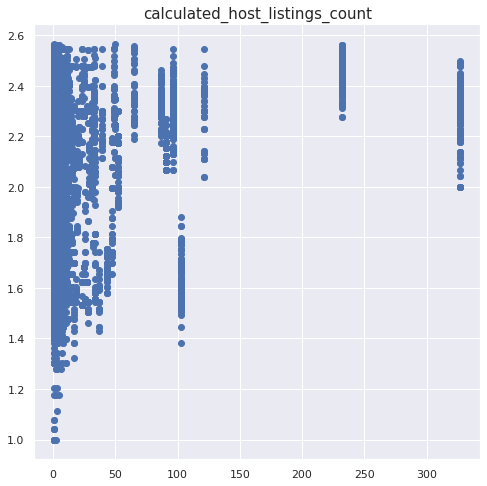

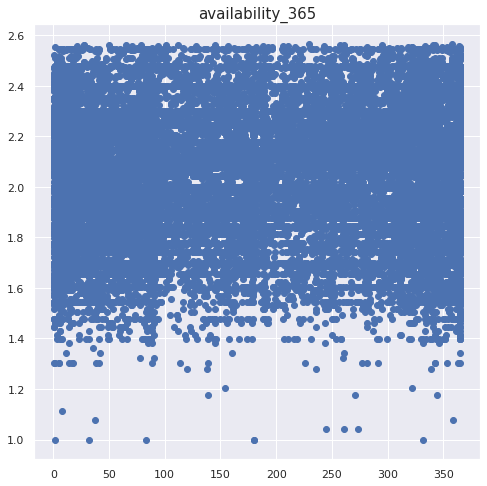

In [97]:
for i in X2_train.columns:
    plt.title(i ,fontsize=15)
    plt.scatter(X2_train[str(i)], y_train.price_log10)
    plt.show()

In [98]:
X_train = fit_X.transform(X_train)
X_test = fit_X.transform(X_test)
y_train = fit_y.transform(y_train)
y_test = fit_y.transform(y_test)

In [99]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
print(f'lm.coef=> {lm.coef_}')
y2 = lm.predict(X_train)
print('MAE Model:',metrics.mean_absolute_error(y_train, y2))
print('MSE Model:',metrics.mean_squared_error(y_train, y2))
print('RMSE Model:',np.sqrt(metrics.mean_squared_error(y_train, y2)))
print('R2 Model:', metrics.r2_score(y_train, y2))

lm.coef=> [[ 0.03513606  0.02657258  0.10994769 -0.40308913 -0.37912478 -0.60976881
   0.05681079  0.03622646]]
MAE Model: 0.08904108835841294
MSE Model: 0.013201101907502616
RMSE Model: 0.11489604826756496
R2 Model: 0.5232017810871465


MAE: 0.09070211677142105
MSE: 0.013751593055743772
RMSE: 0.11726718661136103
R2: 0.5029025063608455


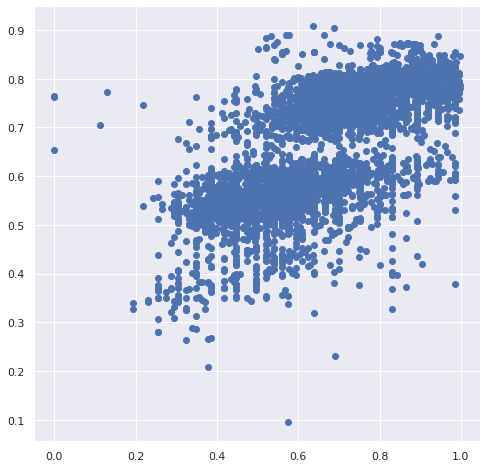

In [101]:
yhat = lm.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, yhat))
print('MSE:',metrics.mean_squared_error(y_test, yhat))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('R2:', metrics.r2_score(y_test, yhat))
plt.scatter(y_test, yhat)
plt.show()

In [102]:
y_test

array([[0.62778331],
       [0.49732736],
       [0.94404889],
       ...,
       [0.51954431],
       [0.66556865],
       [0.93938384]])

In [103]:
yhat

array([[0.54869958],
       [0.5497399 ],
       [0.78966431],
       ...,
       [0.56778078],
       [0.5958794 ],
       [0.78683836]])

# Train test split 

In [ ]:

y = all_data['price']
x= all_data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)


# Modelling

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.050
R-squared test score: 0.043


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.050
R-squared test score: 0.043


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.298
R-squared score (test): 0.253


In [ ]:
# Remove 10% data randomly
df_copy = df.copy()
def delet_10(col):
    col.iloc[col.sample(frac = 0.1).index] = np.nan
    return col

df_copy.apply(delet_10, axis=0)

In [ ]:
#Imputing Missing values with 0


def train_X_imputing_0(df):
    df = df.fillna(0)
    X = df.values
    return X

#Imputing Missing values with Mean
def train_X_imputing_mean(df):
    df = df.fillna(0)
    X = df.values
    return X

In [ ]:
#build the modle 
def train_linear_regression_reg(X,y,r = 0.01):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    

    XTX = XTX + r * np.eye(XTX.shape[0])
    
    

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:] 

def rmse(y, y_pred):
    error = y - y_pred
    squared = error ** 2
    mean_squared = squared.mean()
    return np.sqrt(mean_squared)

In [ ]:
#build the modle use 0
X_train = train_X_imputing_0(df_train)

w0,w = train_linear_regression_reg(X_train,y_train,r = 0)

# Predicting on Validation set
y_pred_train = w0 + X_train.dot(w)

# Predicting on Validation set
X_val = train_X_imputing_0(df_val)
y_pred_val = w0 + X_val.dot(w)

# rmse
print("RMSE_train with 0: %s" %rmse(y_train, y_pred_train).round(2))
print("RMSE_valid with 0: %s" %rmse(y_val, y_pred_val).round(2))


#build the modle use mean
X_train = train_X_imputing_mean(df_train)

w0,w = train_linear_regression_reg(X_train,y_train, r = 0)
# Predicting on Training set
y_pred_train = w0 + X_train.dot(w)

# Predicting on Validation set
X_val = train_X_imputing_mean(df_val)
y_pred_val = w0 + X_val.dot(w)

# rmse
print("RMSE_train with mean: %s" %rmse(y_train, y_pred_train).round(2))
print("RMSE_valid with mean: %s" %rmse(y_val, y_pred_val).round(2))

RMSE_train with 0: 0.65
RMSE_valid with 0: 0.64
RMSE_train with mean: 0.65
RMSE_valid with mean: 0.64


# Answer the following questions

**Which independent variables are useful to predict a target (dependent variable)?**

A: Below is the rank of the dependent variables
 0   id                                      
 1   name                                   
 2   host_id                                 
 3   host_name                             
 4   neighbourhood_group                   
 5   neighbourhood                          
 6   latitude                            
 7   longitude                           
 8   room_type                              
 9   price                                    
 10  minimum_nights                      
 11  number_of_reviews                        
 12  last_review                     
 13  reviews_per_month                 
 14  calculated_host_listings_count        
 15  availability_365           

**Which independent variables have missing data? How much?**
A: Below is missing data and their proportions

* name: 0.03%
* host_name: 0.04
* last_review: 20.5%
* reviews_per_month: 20.5%

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**
A:

 No, looking at our analysis of outlier above, except that neighborhood_group has some special data (manhattan's price is particularly high), we have carried out some deletion processing, and we have not processed other independent variables.

**Do the training and test sets have the same data?**

A: Yes, most of the data are same in test, I have split some from original data to test  train and validation data set, that means about a few data have not been included in trainning.

**In the predictor variables independent of all the other predictor variables?**
A: No, they are not independet of each other. I have done Correlation Test, for example, (price and latitude), (price and number of reviews) are Probably dependent. We can also see from the figure that there is collinearity between many variables.

**Which predictor variables are the most important?**

A:

 0   calculated_host_listings_count                              
 1   longitude                                  
 2   name                               
 3   host_name                             
 4   availability_365                 
 5   id               
 6   latitude                            
 7   neighbourhood_group                            
 8   room_type                              
 9   host_id                                    
 10  minimum_nights                      
 11  number_of_reviews                        
 12  last_review                     
 13  reviews_per_month                 
 14  neighbourhood             

**Do the ranges of the predictor variables make sense?**
A:

Yes,it make sense. I think the price of airbnb in New York is affected by a combination of factors. My model involves dimensions, neighborhood blocks, availability_365 , room_type, etc. It is difficult to say which factor is the most influential factor among these factors (the data shows that dimension),Thats what I thought about the relatioship between those factors. And the R-squared score of our last model is great. As expected, these models confirm my view.

**What are the distributions of the predictor variables?**

A:

Looking at the graph wrote for the distribution of each independent variable before, most of them are roughly following normal distribution, and then I did the Normality Test. Except for a few variables that exceeded Probably not Gaussian at the 5% level, other variables are following the normal distribution.

**What are the distributions of the predictor variables?**

A:
Looking at the graph wrote for the distribution of price, and I have done the Normality Test, price which is probably not Gaussian at the 1% level, so the predictor variables are following the normal distribution.


**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

A:

It can be seen that I randomly removed 10% of the data, and then used two methods for imputation, (one is to use 0 and the other is to use mean), and then I build the model and train, the result that two methods are constructed The models score the same.


**What code is yours and what have you adapted?**

A: 

Data cleaning, analysis method and the drawing graph is my original code, model creation, regression analysis and other parts refer to the following reference.



# Refernces

https://www.cnblogs.com/shida-liu/p/13096214.html

https://blog.csdn.net/Naola2001/article/details/50894307

https://www.kaggle.com/code/alisharifi2000/hypothesis-test

https://www.kaggle.com/code/aliedalat/eda-fill-nan-outlier-hr-analysis

https://www.kaggle.com/code/maxreis/hr-analytics-submission-h2o-glm

# License

Copyright (C) <2022> Ping Chen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.